<a href="https://colab.research.google.com/github/Mitanshi390/Diabetic_Retinopathy_Detection/blob/main/diabeticRetinopathyDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>





# <code style="background:cyan; color:red;"> PREPARED BY : MITANSHI </code>
# <code style="background:cyan; color:red;"> DIABETIC RETINOPATHY DETECTION USING DEEP LEARNING  </code>


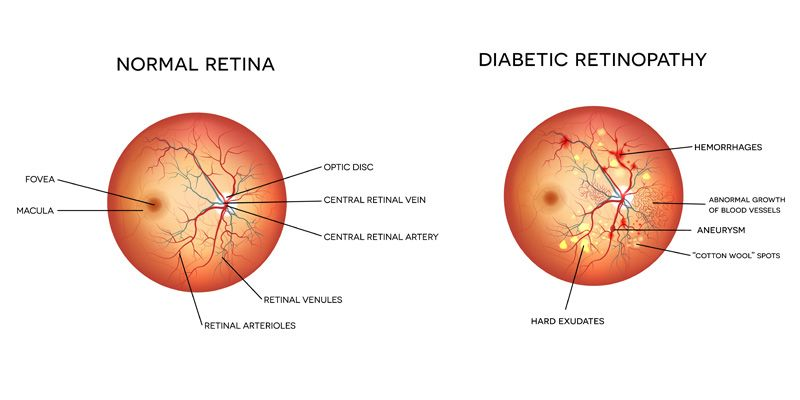

# <code style="background:	#77C3EC;color:#00008B;">                    IMPORTING REQUIRED LIBRARIES                         <code style="background:	#77C3EC;color:#00008B;">

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten, Dense, Activation
from tensorflow .keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

import os
import shutil
import pathlib
import PIL
from PIL import Image, UnidentifiedImageError
import cv2
import time
import random
import itertools



import warnings
warnings.filterwarnings("ignore")

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)


# <code style="background:	#77C3EC;color:#00008B;">                         ABOUT THE DATASET
* It is a subset of the APTOS 2019 Blindness Detection Kaggle Competition Dataset.
* There are 3662 images of gaussian filtered retina scan images.
* These images are stored into five folders as
  *  0:No_DR
  *  1:Mild
  *  2:Moderate
  *  3:Severe
  *  4:Proliferate_DR<code style="background:#77C3EC;color:#00008B;">

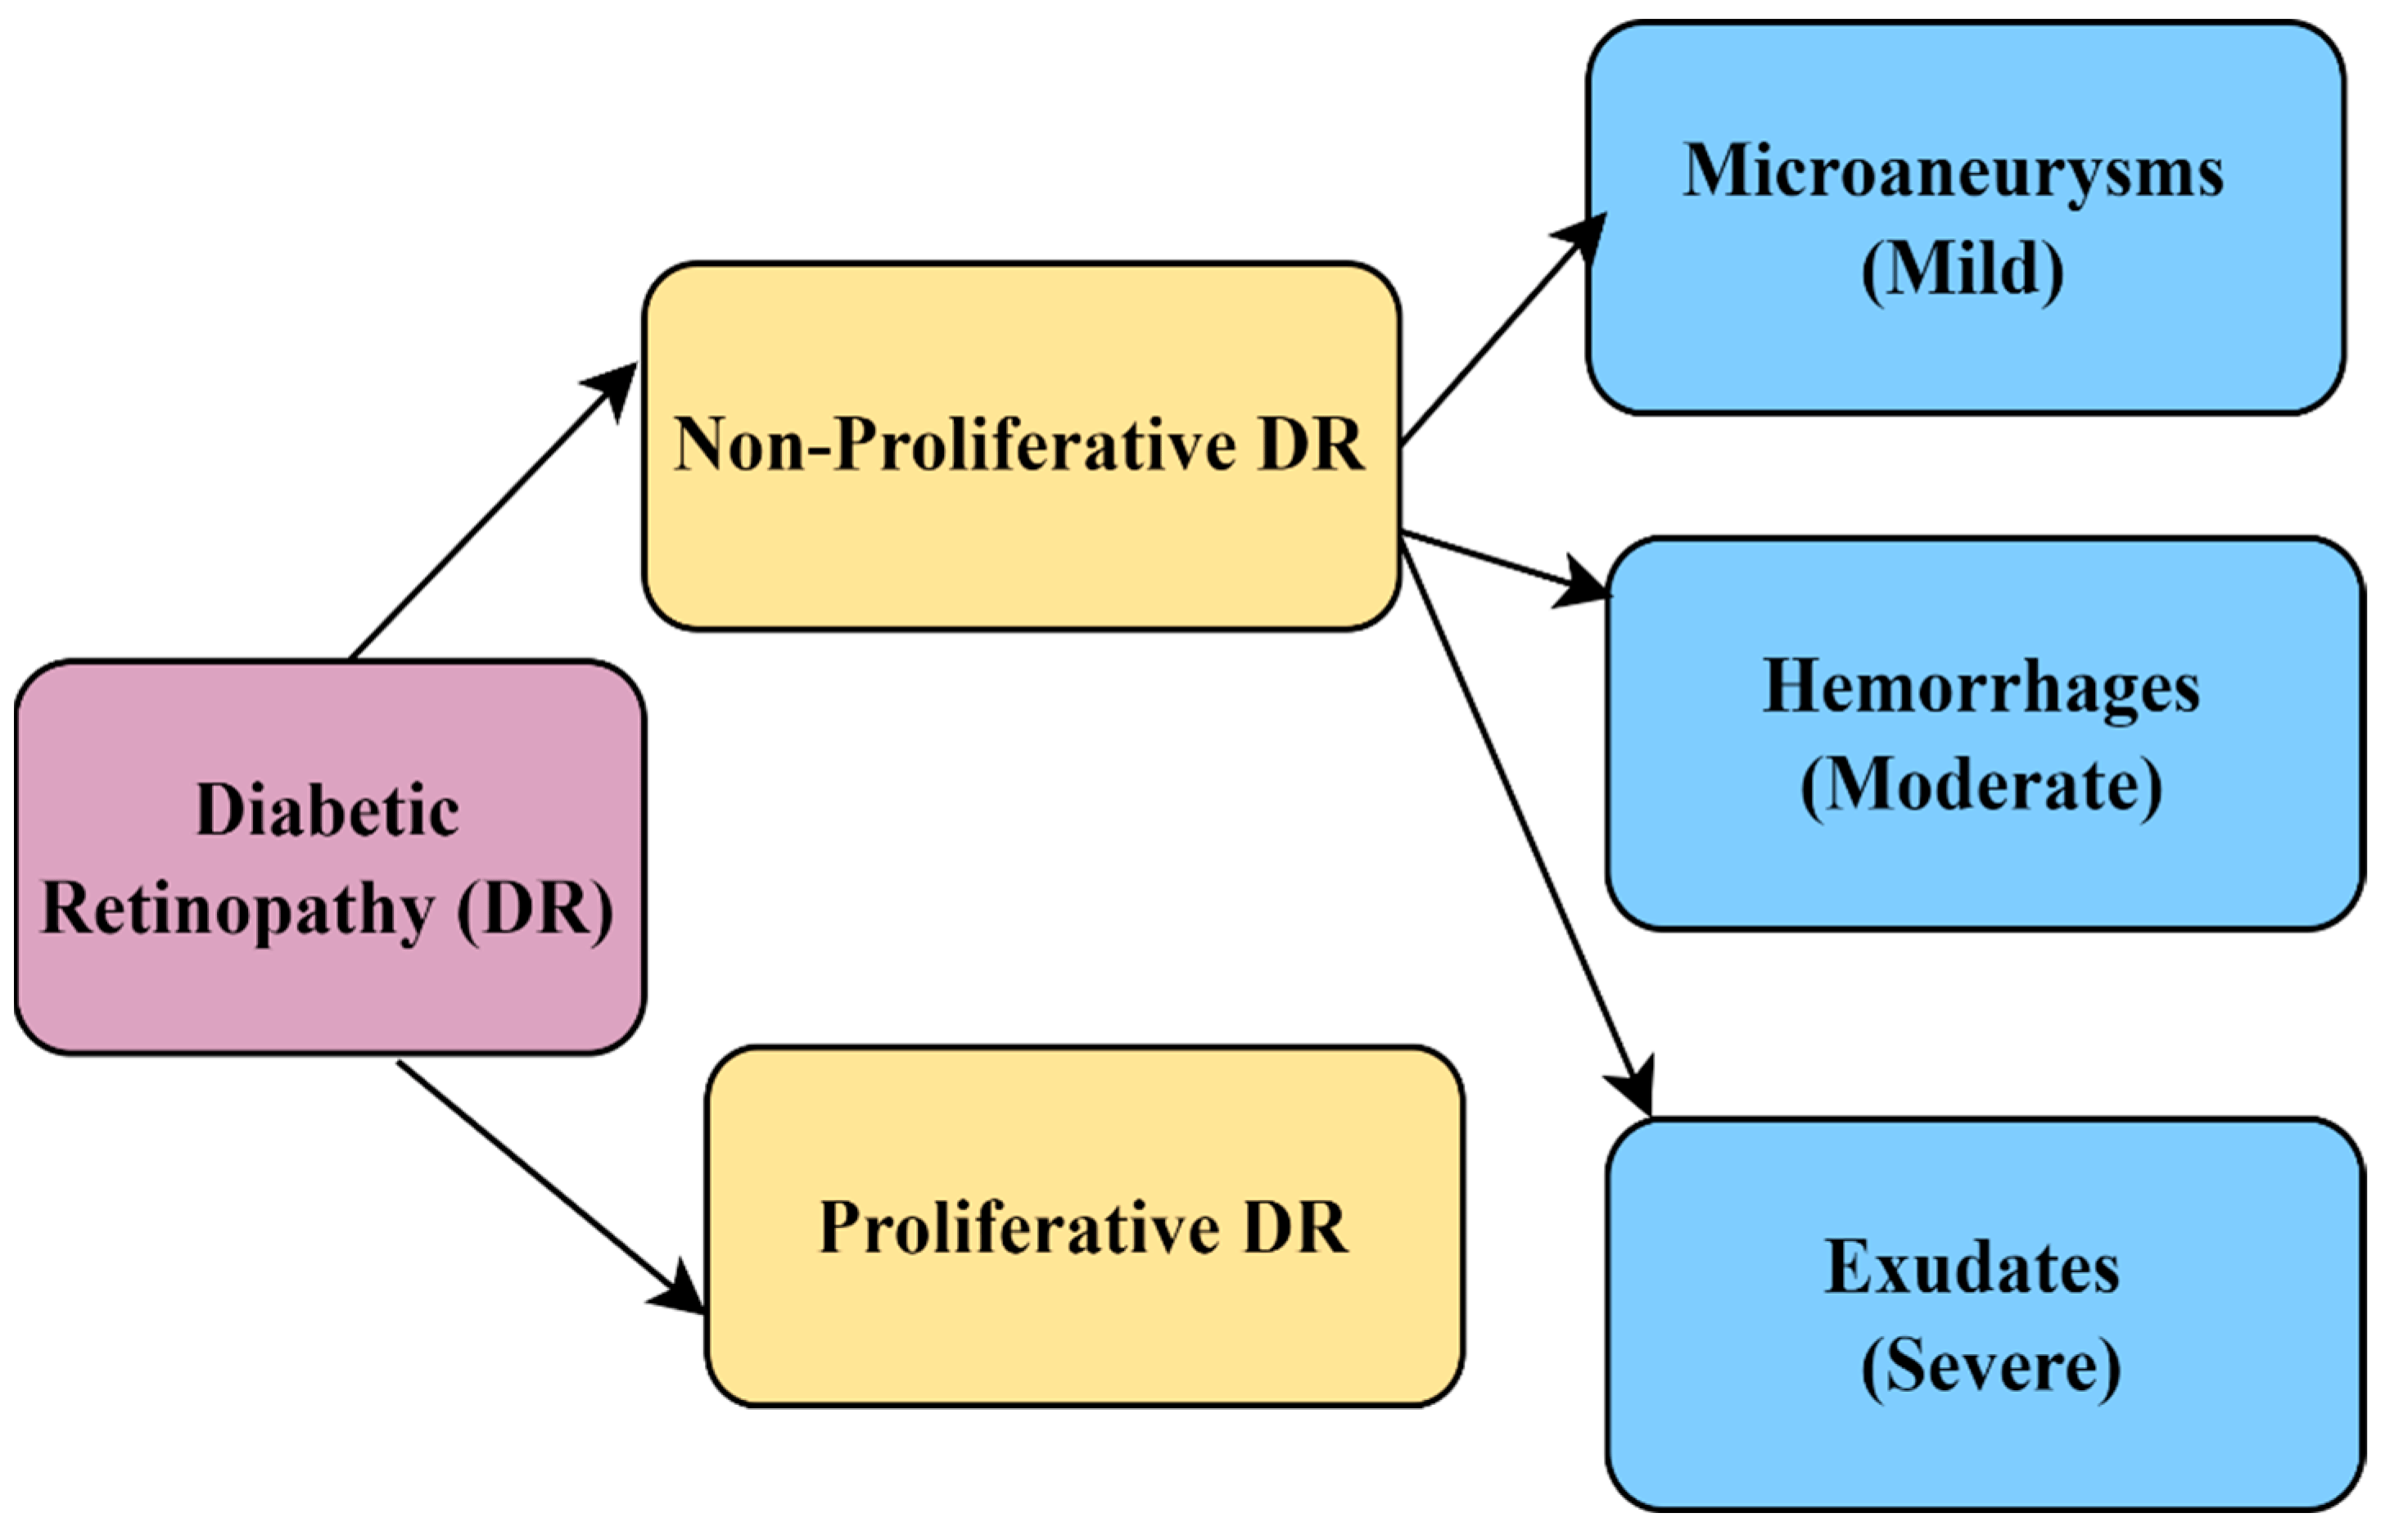

# <code style="background:	#77C3EC;color:#00008B;">                          IMPORTING DATASET                         <code style="background:#77C3EC;color:#00008B;">

In [ ]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d mariaherrerot/aptos2019

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/mariaherrerot/aptos2019
License(s): unknown
100% 8.00G/8.01G [01:50<00:00, 124MB/s]
100% 8.01G/8.01G [01:50<00:00, 77.9MB/s]


In [ ]:
# unzip the downloaded dataset
!unzip /content/aptos2019.zip



Archive:  /content/aptos2019.zip
  inflating: test.csv                
  inflating: test_images/test_images/e4dcca36ceb4.png  
  inflating: test_images/test_images/e4e343eaae2a.png  
  inflating: test_images/test_images/e4f12411fd85.png  
  inflating: test_images/test_images/e50b0174690d.png  
  inflating: test_images/test_images/e5197d77ec68.png  
  inflating: test_images/test_images/e529c5757d64.png  
  inflating: test_images/test_images/e52ed5c29c5e.png  
  inflating: test_images/test_images/e540d2e35d15.png  
  inflating: test_images/test_images/e55188915f9d.png  
  inflating: test_images/test_images/e580676516b0.png  
  inflating: test_images/test_images/e582e56e7942.png  
  inflating: test_images/test_images/e594c19e2e1d.png  
  inflating: test_images/test_images/e599151ca14b.png  
  inflating: test_images/test_images/e59c5f345bb0.png  
  inflating: test_images/test_images/e5d56f4f359b.png  
  inflating: test_images/test_images/e5de79795c1d.png  
  inflating: test_images/test_ima

In [ ]:
dataset=pd.read_csv('/content/drive/MyDrive/DiabeticRetinopathyDetection/diabeticRetionpathyDataset/train.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset.head(5)

id_code  diagnosis
0  000c1434d8d7          2
1  001639a390f0          4
2  0024cdab0c1e          1
3  002c21358ce6          0
4  005b95c28852          0

# <code style="background:	#77C3EC;color:#00008B;">                          DATASET ANALYSIS                                   <code style="background:#77C3EC;color:#00008B;">

In [ ]:
# mapping classes to data

diagnosis_binary = {
        0: 'No_DR',
        1: 'DR',
        2: 'DR',
        3: 'DR',
        4: 'DR'}

diagnosis_classes = {
    0: 'No_DR',
    1: 'Mild',
    2: 'Moderate',
    3: 'Severe',
    4: 'Proliferate_DR',
}


dataset["binary"] = dataset["diagnosis"].map(diagnosis_binary.get)
dataset["type"] = dataset["diagnosis"].map(diagnosis_classes.get)

<Axes: xlabel='binary'>

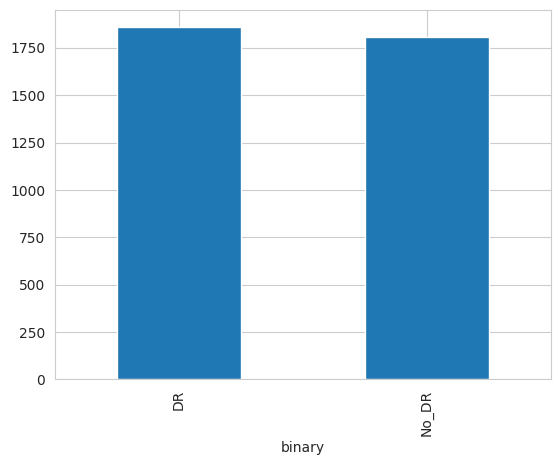

In [ ]:
dataset['binary'].value_counts().plot(kind='bar')


<Axes: xlabel='diagnosis'>

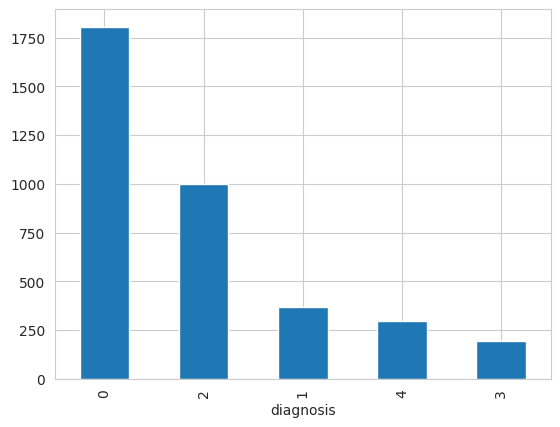

In [ ]:
dataset['diagnosis'].value_counts().plot(kind='bar')


*  CONVERTING FILES INTO LIST


In [ ]:
Path_data = '/content/drive/MyDrive/DiabeticRetinopathyDetection/diabeticRetionpathyDataset/diabetic_retinopathy_images'
data = os.listdir(Path_data)
Healthy = os.listdir('/content/drive/MyDrive/DiabeticRetinopathyDetection/diabeticRetionpathyDataset/diabetic_retinopathy_images/No_DR')
Mild = os.listdir('/content/drive/MyDrive/DiabeticRetinopathyDetection/diabeticRetionpathyDataset/diabetic_retinopathy_images/Mild')
Moderate = os.listdir('/content/drive/MyDrive/DiabeticRetinopathyDetection/diabeticRetionpathyDataset/diabetic_retinopathy_images/Moderate')
Proliferate = os.listdir('/content/drive/MyDrive/DiabeticRetinopathyDetection/diabeticRetionpathyDataset/diabetic_retinopathy_images/Proliferate_DR')
Severe = os.listdir('/content/drive/MyDrive/DiabeticRetinopathyDetection/diabeticRetionpathyDataset/diabetic_retinopathy_images/Severe')

In [ ]:
print("classes names :", (data), "\n______________________________\n")
print("Number of classes :", len(data), "\n______________________________\n")
print("Number of Healty images :", len(Healthy), "\n______________________________\n")
print("Number of Mild images :", len(Mild),  "\n______________________________\n")
print("Number of Moderate images :", len(Moderate),  "\n______________________________\n")
print("Number of Proliferate images :", len(Proliferate),  "\n______________________________\n")
print("Number of severe images :", len(Severe),  "\n______________________________\n")

classes names : ['Mild', 'Severe', 'Moderate', 'Proliferate_DR', 'No_DR'] 
______________________________

Number of classes : 5 
______________________________

Number of Healty images : 1805 
______________________________

Number of Mild images : 370 
______________________________

Number of Moderate images : 999 
______________________________

Number of Proliferate images : 295 
______________________________

Number of severe images : 193 
______________________________



In [ ]:
Path_data = '/content/drive/MyDrive/DiabeticRetinopathyDetection/diabeticRetionpathyDataset/diabetic_retinopathy_images'

imgpaths = []
labels =[]

data = os.listdir(Path_data)

# generating paths and Labels of classes and images in data

for i in data:
    classpath = os.path.join(Path_data, i)
    imglist = os.listdir(classpath)

    for img in imglist:
        imgpath = os.path.join(classpath, img)

        imgpaths.append(imgpath)
        labels.append(i)

Paths = pd.Series(imgpaths, name = 'Paths')
Labels = pd.Series(labels, name = 'Labels')
Df= pd.concat([Paths, Labels], axis = 1)
Df.head(5)

Paths Labels
0  /content/drive/MyDrive/DiabeticRetinopathyDete...   Mild
1  /content/drive/MyDrive/DiabeticRetinopathyDete...   Mild
2  /content/drive/MyDrive/DiabeticRetinopathyDete...   Mild
3  /content/drive/MyDrive/DiabeticRetinopathyDete...   Mild
4  /content/drive/MyDrive/DiabeticRetinopathyDete...   Mild

# <code style="background:	#77C3EC;color:#00008B;">                          DATA PREPROCESSING                                   <code style="background:#77C3EC;color:#00008B;">






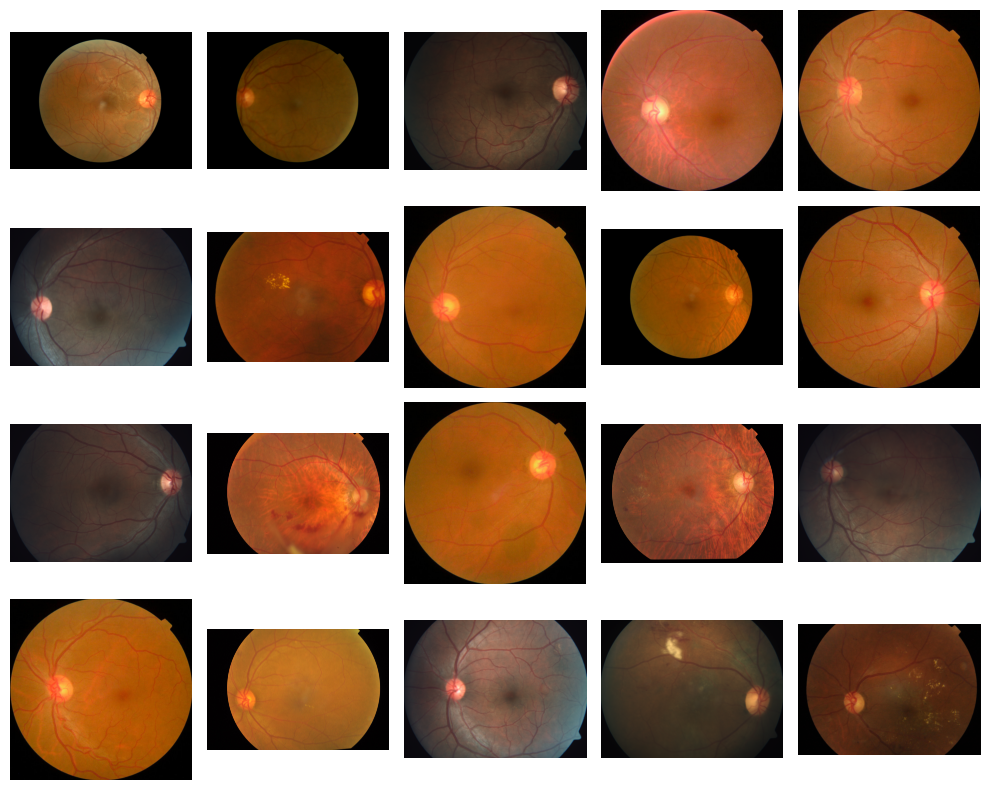

In [ ]:
import matplotlib.pyplot as plt
from IPython.display import Image, display
import os

def display_images_in_grid(folder_path, num_images=20, rows=4, cols=5):
    """Displays images from a folder in a grid using matplotlib.pyplot.

    Args:
        folder_path: Path to the folder containing the images.
        num_images: Number of images to display.
        rows: Number of rows in the grid.
        cols: Number of columns in the grid.
    """

    fig, axes = plt.subplots(rows, cols, figsize=(cols * 2, rows * 2))  # Adjust figsize as needed

    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
    image_files = image_files[:num_images]  # Select the first num_images

    for i, image_file in enumerate(image_files):
        image_path = os.path.join(folder_path, image_file)

        row = i // cols
        col = i % cols

        axes[row, col].imshow(plt.imread(image_path))
        axes[row, col].axis('off')  # Remove axis ticks and labels

    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()

# Example usage:
folder_path = '/content/train_images/train_images'  # Replace with your folder path
display_images_in_grid(folder_path)

In [ ]:
# RESIZE
from PIL import Image

# Open the image using PIL
image = Image.open("/content/train_images/train_images/1ae8c165fd53.png")


resized_image = image.resize((224, 224))  # Resize



In [ ]:
from skimage.restoration import denoise_tv_chambolle

# Load an image using scikit-image
from skimage import io
image = io.imread('/content/train_images/train_images/1ae8c165fd53.png')

# Apply total variation denoising
denoised_image = denoise_tv_chambolle(image, weight=0.1)

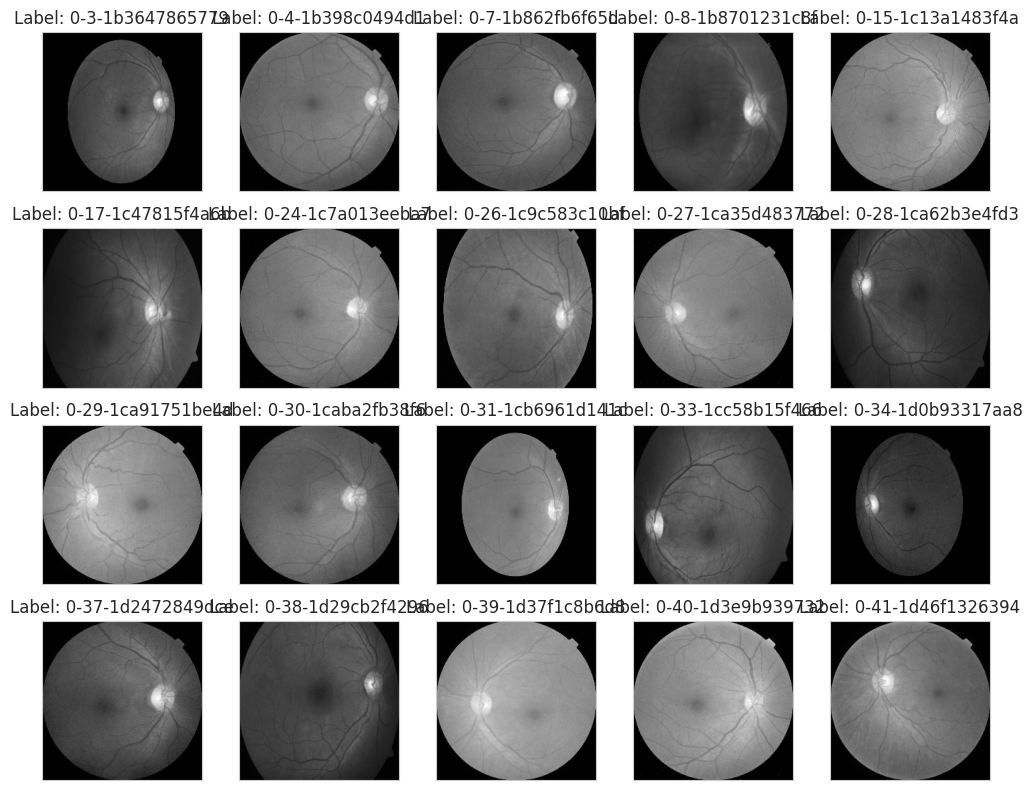

In [ ]:
# Gray Scale
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

# Predefine IMG_SIZE and df_train
IMG_SIZE = 224
df_train = pd.read_csv('/content/train_1.csv')

# Assuming df_train is already loaded with your data
train_y = df_train['diagnosis']

# Assuming IMG_SIZE is defined prior to this section  (This comment is no longer necessary)

fig = plt.figure(figsize=(10, 8)) # Adjust figure size for 4x5 grid
image_count = 0  # Counter to track displayed images

for class_id in sorted(train_y.unique()):
    for i, (idx, row) in enumerate(df_train.loc[df_train['diagnosis'] == class_id].iterrows()):
        if image_count >= 20:  # Stop after displaying 20 images
            break

        ax = fig.add_subplot(4, 5, image_count + 1, xticks=[], yticks=[])  # 4 rows, 5 cols
        path = f"/content/train_images/train_images/{row['id_code']}.png"
        image = cv2.imread(path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
        plt.imshow(image, cmap='gray')
        ax.set_title('Label: %d-%d-%s' % (class_id, idx, row['id_code']))

        image_count += 1

    if image_count >= 20:
        break

plt.tight_layout()
plt.show()

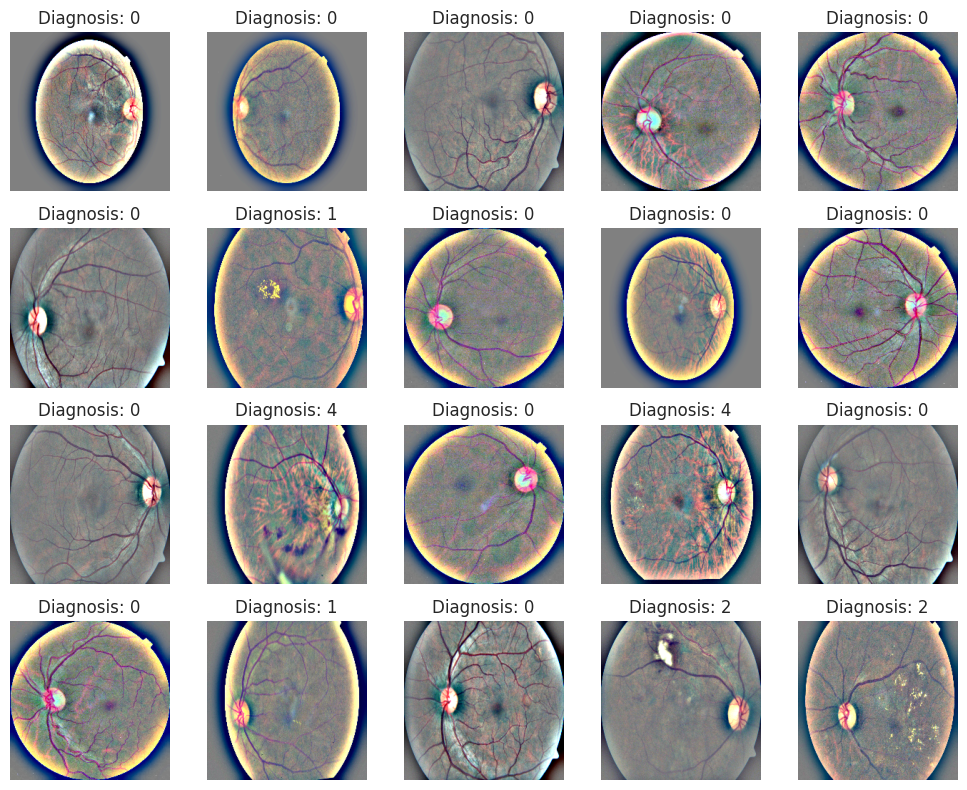

In [ ]:
# Ben Graham's Preprocessing Method
# Ben Graham's Preprocessing Method
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
import pandas as pd

# Assuming your training images are in a directory called "train_images"
train_dir = "/content/train_images/train_images"

# Assuming you have a CSV file named "train_labels.csv" with image filenames and diagnoses
labels_df = pd.read_csv("train_1.csv")

# Define a function to load and preprocess a single image
def load_ben_color(path, sigmaX=10):
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Implement crop_image_from_gray if available
    # image = crop_image_from_gray(image)
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    image = cv2.addWeighted(image, 4, cv2.GaussianBlur(image, (0, 0), sigmaX), -4, 128)
    return image

# Get a list of image files in the training directory
image_files = [f for f in os.listdir(train_dir) if os.path.isfile(os.path.join(train_dir, f))]

# Display the first 20 images in a 4x5 grid
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
for i in range(20):
    plt.subplot(4, 5, i + 1)  # Create subplots in a 4x5 grid
    image_path = os.path.join(train_dir, image_files[i])
    image = load_ben_color(image_path)
    plt.imshow(image)

    # Get the diagnosis from the labels DataFrame using the filename
    # Changed 'image_filename' to 'id_code' to match the column name in your CSV
    diagnosis = labels_df.loc[labels_df["id_code"] == image_files[i].split('.')[0], "diagnosis"].values[0]
    plt.title(f"Diagnosis: {diagnosis}")  # Display diagnosis as the title
    plt.axis("off")  # Turn off axis labels

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()  # Display the plot

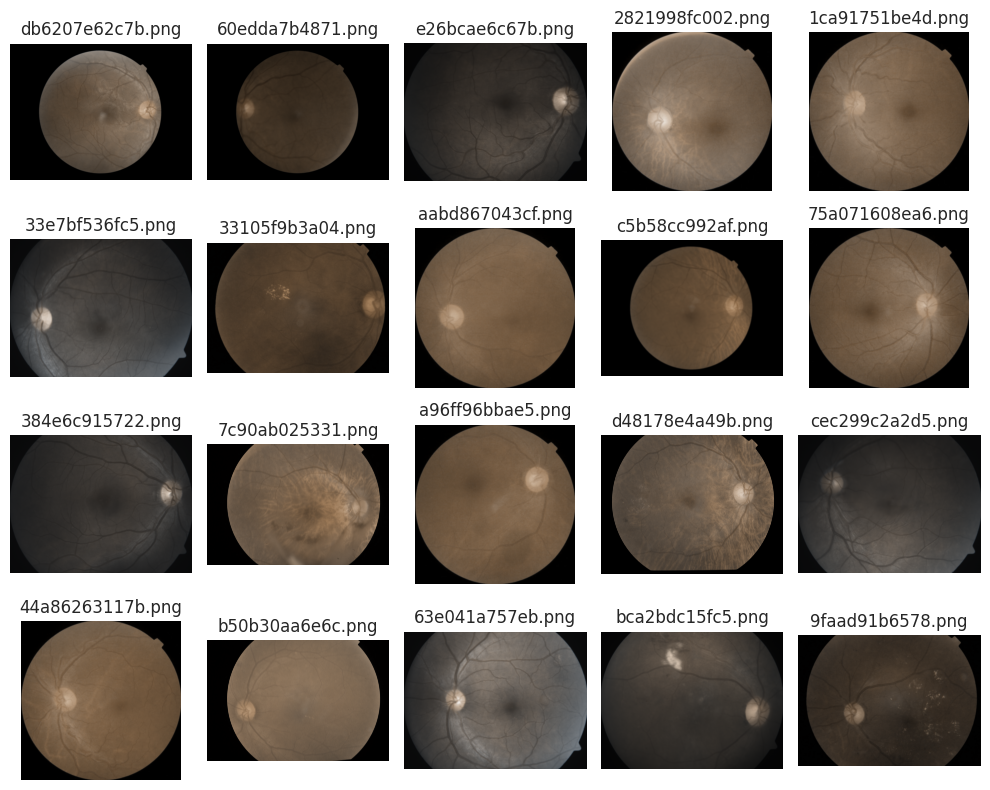

In [ ]:
import numpy as np
from scipy.ndimage import gaussian_filter
from PIL import Image
import matplotlib.pyplot as plt
import os

def display_filtered_images_in_grid(folder_path, num_images=20, rows=4, cols=5, sigma=1.5):
    """Displays Gaussian filtered images from a folder in a grid using matplotlib.pyplot.

    Args:
        folder_path: Path to the folder containing the images.
        num_images: Number of images to display.
        rows: Number of rows in the grid.
        cols: Number of columns in the grid.
        sigma: Standard deviation for the Gaussian filter.
    """

    fig, axes = plt.subplots(rows, cols, figsize=(cols * 2, rows * 2))  # Adjust figsize as needed

    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
    image_files = image_files[:num_images]  # Select the first num_images

    for i, image_file in enumerate(image_files):
        image_path = os.path.join(folder_path, image_file)

        # Load the image using PIL
        image = Image.open(image_path)
        image_np = np.array(image)

        # Apply Gaussian filter
        filtered_image = gaussian_filter(image_np, sigma=sigma)

        row = i // cols
        col = i % cols

        axes[row, col].imshow(filtered_image)  # Display filtered image
        axes[row, col].axis('off')  # Remove axis ticks and labels
        axes[row, col].set_title(image_file) # Set title as filename

    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()

# Example usage:
folder_path = '/content/train_images/train_images'
display_filtered_images_in_grid(folder_path)


UNDERSAMPLING TECHNIQUES
*   **Random undersampling**:We observed there are 1805 No_DR images and 193 proliferate images in order to balance the dataset we use random oversampling technique.

*  **Data Augmentation**: To increase the amount of data by adding slightly modified copies of already existing data or newly created synthetic data from existing data. It acts as a regularizer and helps reduce overfitting when training a machine learning model.  


In [ ]:
X= Df.drop(['Labels'], axis = 1)
y = Df['Labels']
y.value_counts()

Labels
No_DR             1805
Moderate           999
Mild               370
Proliferate_DR     295
Severe             193
Name: count, dtype: int64

In [ ]:
#from imblearn.over_sampling import RandomOverSampler

#ros = RandomOverSampler(sampling_strategy= 'not majority')#string
#ros = RandomOverSampler(sampling_strategy= 1) #Numerical value

#x_ros, y_ros= ros.fit_resample(X, y)

#ax = y_ros.value_counts().plot.pie(autopct='%.2f')
#_ = ax.set_title('over-sampling')

**SPLIT TRAIN TEST**

In [ ]:
#train, valid  and test dataframes
train, testval = train_test_split(Df, test_size = 0.2, shuffle = True, random_state = 123)
valid, test = train_test_split(testval, test_size = 0.5, shuffle = True, random_state = 123)

print("Train shape: ", train.shape)
print("Valid shape: ", valid.shape)
print("Test shape: ",test.shape)

train.Labels.value_counts()

Train shape:  (2929, 2)
Valid shape:  (366, 2)
Test shape:  (367, 2)


Labels
No_DR             1440
Moderate           787
Mild               315
Proliferate_DR     226
Severe             161
Name: count, dtype: int64

# <code style="background:cyan; color:red;"> DATA AUGMENTATION </code>

In [ ]:
batch_size = 20
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)


# generators

tr_G = ImageDataGenerator(
    zca_whitening=True,
    rotation_range=30.,
    fill_mode='nearest',
    )

V_G = ImageDataGenerator()

t_G = ImageDataGenerator()

#Generate Appropriate Data for fitting into model

Train = tr_G.flow_from_dataframe(train, x_col = 'Paths', y_col = 'Labels', target_size = img_size, class_mode = 'categorical', color_mode = 'rgb', shuffle = True, batch_size = batch_size)
Valid = V_G.flow_from_dataframe(valid, x_col = 'Paths', y_col = 'Labels', target_size = img_size, class_mode = 'categorical', color_mode = 'rgb', shuffle = True, batch_size = batch_size)
Test = t_G.flow_from_dataframe(test, x_col = 'Paths', y_col = 'Labels', target_size = img_size, class_mode = 'categorical', color_mode = 'rgb', shuffle = False, batch_size = batch_size)

Found 2929 validated image filenames belonging to 5 classes.
Found 366 validated image filenames belonging to 5 classes.
Found 367 validated image filenames belonging to 5 classes.


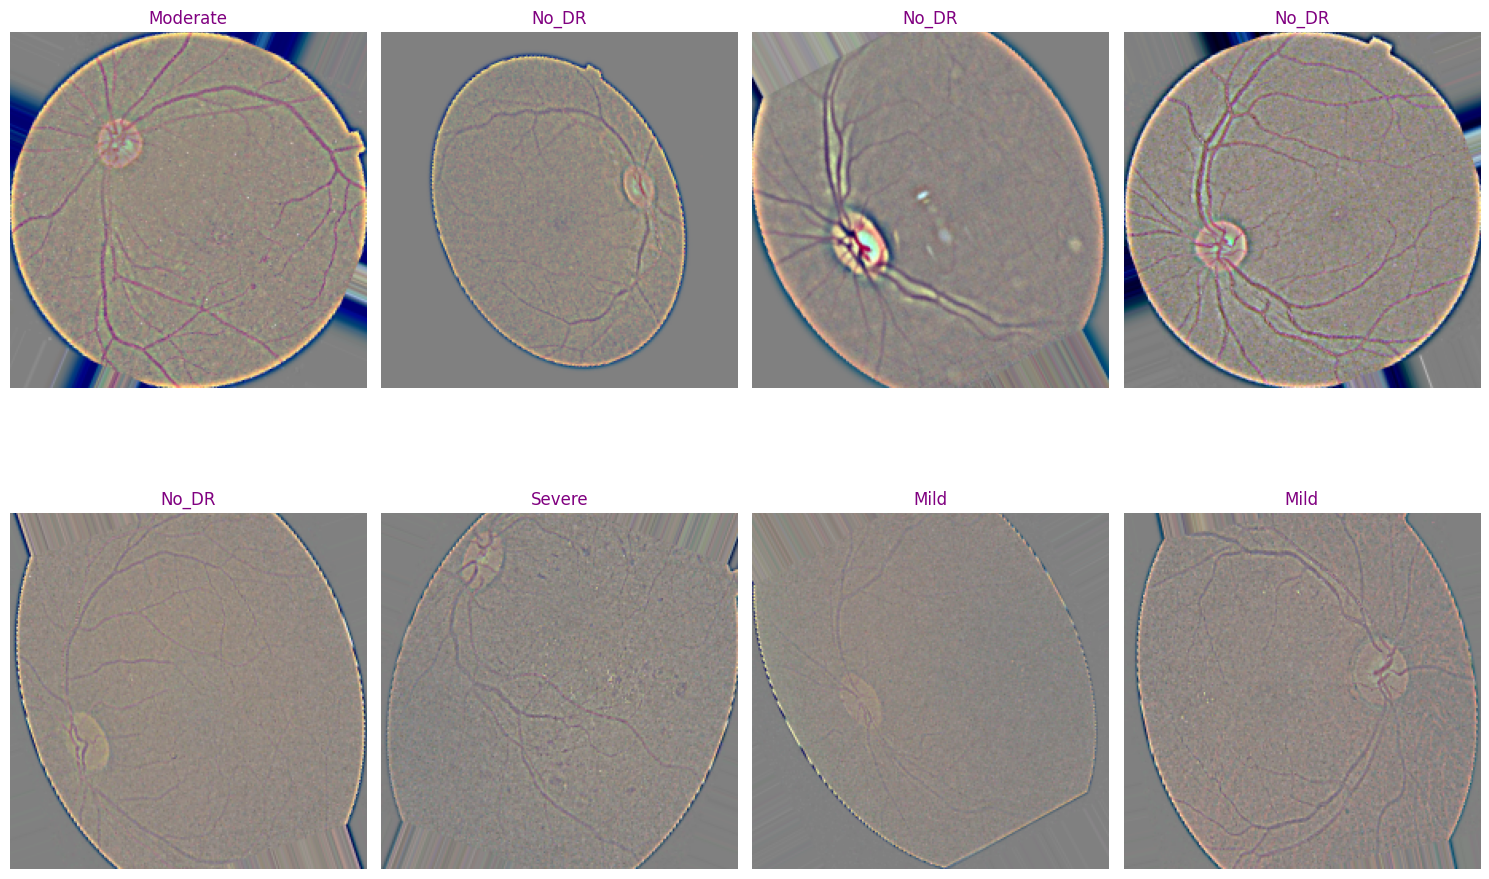

In [ ]:
# Define labels and their indices as a dict
L_index = Train.class_indices
L_index

# Store Labels in a list
Keys = list(L_index.keys())
Keys

Train.reset()

# Iterate to the desired batch (e.g., 5th batch)
for _ in range(9):  # Iterate 4 times to reach the 5th batch (0-indexed)
    next(Train)  # Discard the intermediate batches

# Get the desired (5th) batch
imgs, labels = next(Train)

# Visualization
plt.figure(figsize= (15, 15))

for i in range(8):
    plt.subplot(3, 4, i +1)
    im = imgs[i]/255
    plt.imshow(im)

    #Labelling
    index = np.argmax(labels[i])
    label = Keys[index]
    plt.title(label, color = 'purple')
    plt.axis('off')

plt.tight_layout()
plt.show()

# <code style="background:cyan; color:red;"> CONVOLUTIONAL NEURAL NETWORK </code>
*  Using EfficientNetB3 model with weights from imagenet

In [ ]:
# Define number of classes
n_classes = len(list(Train.class_indices.keys()))
n_classes

img_shape=(img_size[0], img_size[1], 3)
model_name='EfficientNetB3'
base_model= EfficientNetB3(include_top=False, weights="imagenet",input_shape=img_shape, pooling='max')

# Note: the base model trainable initially- that is WRONG you get better results leaving it trainable
base_model.trainable=True
x=base_model.output
x=BatchNormalization(axis=-1, momentum=0.999, epsilon=0.001 )(x)
x = Dense(1024, kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l1(0.005),
                bias_regularizer=regularizers.l1(0.005), activation='relu')(x)
x = Dense(512, kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l1(0.005),
                bias_regularizer=regularizers.l1(0.005), activation='relu')(x)
x = Dense(256, kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l1(0.005),
                bias_regularizer=regularizers.l1(0.005), activation='relu')(x)
x=Dropout(rate=.4, seed=123)(x)
output=Dense(n_classes, activation='softmax')(x)
model=Model(inputs=base_model.input, outputs=output)
lr=.0001 # start with this learning rate

43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model=Sequential()
model.add(base_model)
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512, activation='elu'))
model.add(Dense(256, activation='elu'))
model.add(Dense(128, activation = 'elu'))
model.add(Dense(5, activation='softmax'))

In [ ]:
model.compile(
    Adamax(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['acc']
)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb3 (Functional)          │ (None, 1536)                │      10,783,535 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1536)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1536)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │         786,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,735,348 (44.77 MB)

 Trainable params: 11,648,045 (44.43 MB)

 Non-trainable params: 87,303 (341.03 KB)

*  VISUALIZE MODEL LAYER

TRAINING PHASE

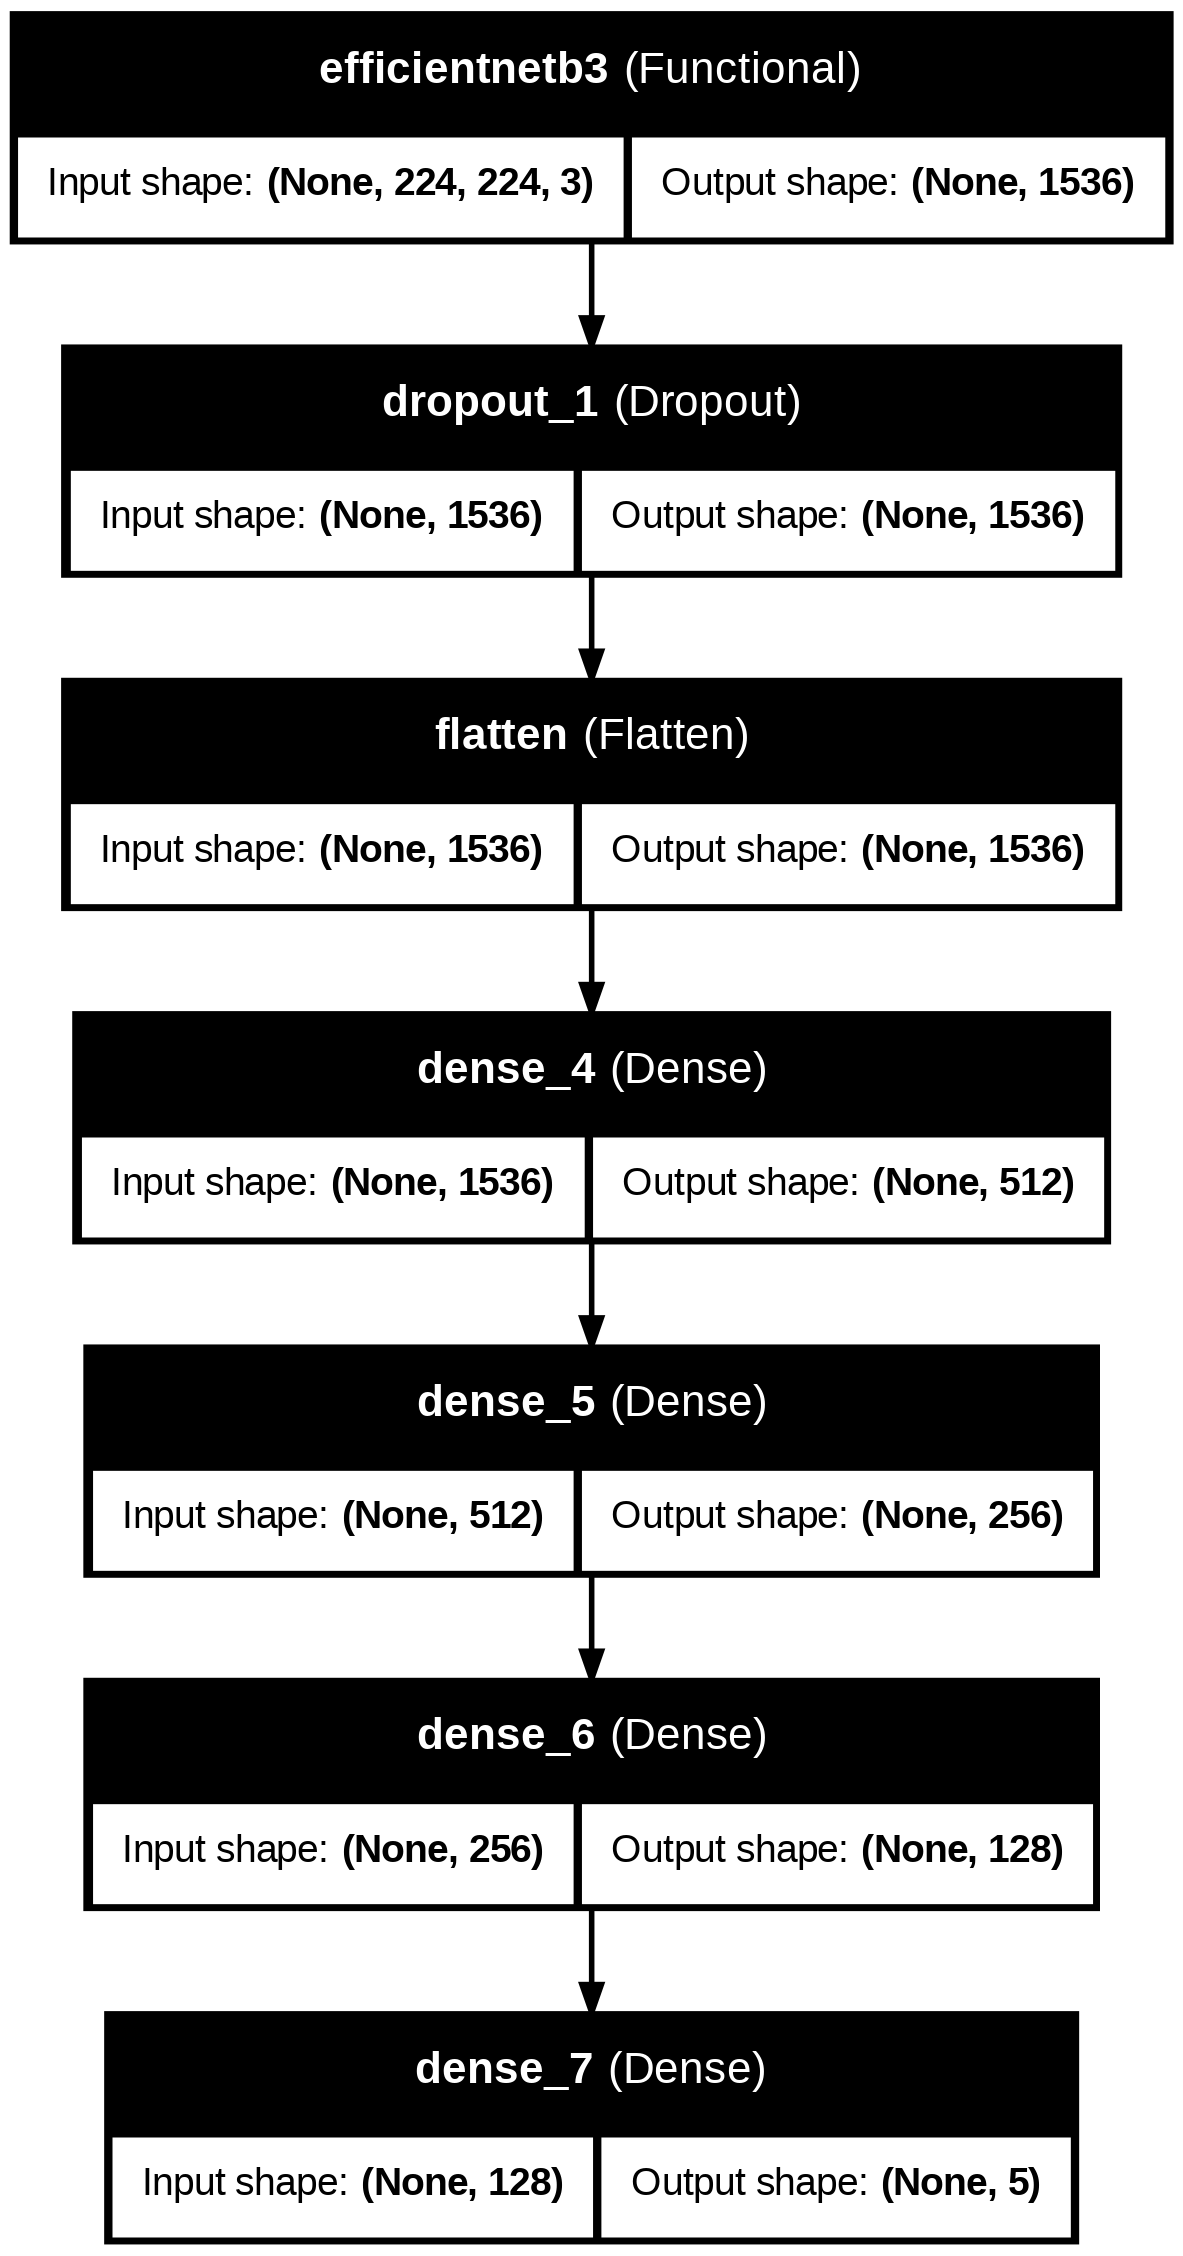

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file='convnet.png', show_shapes=True,show_layer_names=True)
Image(filename='convnet.png')

In [ ]:
epochs = 50
history = model.fit(x= Train, epochs= epochs, verbose= 1, validation_data= Valid, validation_steps= None, shuffle= False)

Epoch 1/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 1416s 9s/step - acc: 0.5163 - loss: 1.6937 - val_acc: 0.6475 - val_loss: 1.1563
Epoch 2/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 57s 388ms/step - acc: 0.6887 - loss: 0.9436 - val_acc: 0.7240 - val_loss: 0.8178
Epoch 3/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 59s 400ms/step - acc: 0.7231 - loss: 0.8356 - val_acc: 0.7432 - val_loss: 0.7241
Epoch 4/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 80s 385ms/step - acc: 0.7168 - loss: 0.8111 - val_acc: 0.7486 - val_loss: 0.6750
Epoch 5/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 58s 394ms/step - acc: 0.7206 - loss: 0.7664 - val_acc: 0.7377 - val_loss: 0.6972
Epoch 6/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 80s 383ms/step - acc: 0.7515 - loss: 0.6931 - val_acc: 0.7459 - val_loss: 0.7145
Epoch 7/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 84s 400ms/step - acc: 0.7716 - loss: 0.6278 - val_acc: 0.7459 - val_loss: 0.6824
Epoch 8/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 57s 384ms/step - acc: 0.7664 - loss: 0.5987 - val_acc: 0.7678 - val_loss: 0.6534
Epoch 9/50
147/147 ━━━━━━━━━━━━━━

# <code style="background:cyan; color:red;"> MODEL EVALUATION </code>

In [ ]:
# accuracy and loss of Train

tr_acc = history.history['acc']
tr_loss = history.history['loss']


# accuracy and loss or Valid\

v_acc = history.history['val_acc']
v_loss = history.history['val_loss']


# highest value of v_acc by getting its index

index_acc = np.argmax(v_acc)
high_Vacc = v_acc[index_acc]


# accuracy and loss of Train

tr_acc = history.history['acc']
tr_loss = history.history['loss']


# accuracy and loss or Valid\

v_acc = history.history['val_acc']
v_loss = history.history['val_loss']


# highest value of v_acc by getting its index

index_acc = np.argmax(v_acc)
high_Vacc = v_acc[index_acc]


# lowest value of v_loss by getting index

index_loss = np.argmin(v_loss)
low_Vloss = v_loss[index_loss]


# n. of epochs based on length of tr_acc values

Epochs =[]
for i in range(len(tr_acc)):
    Epochs.append (i+1)


# Define best epoch

best_acc = f'Best epoch ={str(index_acc +1)}'
best_loss = f'Best epoch ={str(index_loss+1)}'
# n. of epochs based on length of tr_acc values

Epochs =[]
for i in range(len(tr_acc)):
    Epochs.append (i+1)


# Define best epoch

best_acc = f'Best epoch ={str(index_acc +1)}'
best_loss = f'Best epoch ={str(index_loss+1)}'

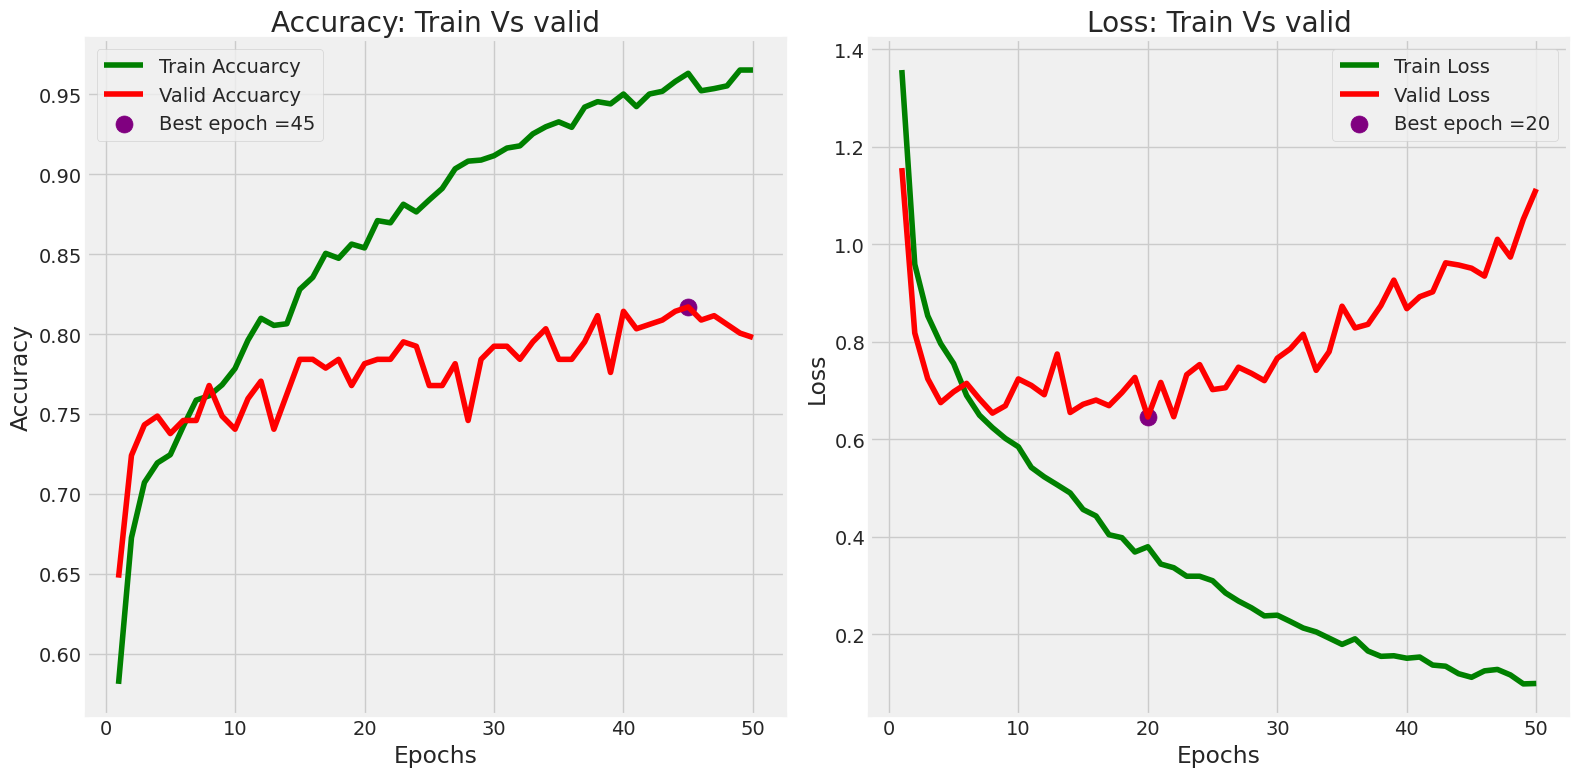

In [ ]:
plt.figure(figsize = (16, 8))
plt.style.use('fivethirtyeight')


plt.subplot(1,2,1)
plt.plot(Epochs, tr_acc, "g", label = "Train Accuarcy")
plt.plot(Epochs, v_acc, "r", label = "Valid Accuarcy")
plt.scatter(index_acc+1, high_Vacc, s= 150, color = 'purple', label = best_acc)

plt.title("Accuracy: Train Vs valid")
plt. xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1,2,2)
plt.plot(Epochs, tr_loss, "g", label = "Train Loss")
plt.plot(Epochs, v_loss, "r", label = "Valid Loss")
plt.scatter(index_loss+1, low_Vloss, s= 150, color = 'purple', label = best_loss)

plt.title("Loss: Train Vs valid")
plt. xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Define Vars
Train_sc = model.evaluate(Train, verbose = 1)
Valid_sc = model.evaluate(Valid, verbose = 1)
Test_sc =model.evaluate(Test, verbose = 1)

#Print
print('Train Scores : \n    accuracy:', Train_sc[1], '\n      Loss: ', Train_sc[0], '\n________________________')
print('Valid Scores : \n    accuracy:', Valid_sc[1], '\n      Loss: ', Valid_sc[0], '\n________________________')
print('Test Scores : \n    accuracy:', Test_sc[1], '\n      Loss: ', Test_sc[0], '\n________________________')

147/147 ━━━━━━━━━━━━━━━━━━━━ 47s 323ms/step - acc: 0.9888 - loss: 0.0371
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - acc: 0.8034 - loss: 1.0950
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 129ms/step - acc: 0.8079 - loss: 0.9289
Train Scores : 
    accuracy: 0.9890747666358948 
      Loss:  0.033999763429164886 
________________________
Valid Scores : 
    accuracy: 0.7978141903877258 
      Loss:  1.1133848428726196 
________________________
Test Scores : 
    accuracy: 0.8147138953208923 
      Loss:  0.8887065649032593 
________________________


In [ ]:
predictions = model.predict(Test)
y_pred = np.argmax(predictions, axis = 1)

#Chack
print(predictions)
print(y_pred)

19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step
[[5.3288446e-10 2.8550448e-15 1.0000000e+00 1.1012513e-15 7.4435579e-19]
 [2.6648119e-04 5.8714145e-09 9.9973351e-01 6.5909465e-11 6.6312858e-11]
 [9.5702983e-02 7.8069800e-01 1.3904125e-04 9.2542961e-02 3.0916914e-02]
 ...
 [1.1640738e-08 6.0581358e-13 1.0000000e+00 9.6230024e-15 8.2030578e-16]
 [3.2517219e-05 2.4610270e-06 9.9996507e-01 2.8306422e-08 1.0617961e-09]
 [1.6188467e-01 8.3795571e-01 1.0489355e-05 1.4268277e-04 6.4532996e-06]]
[2 2 1 2 2 2 2 2 2 1 0 2 3 1 2 2 2 4 2 2 1 1 1 1 2 2 2 2 2 1 4 1 0 2 4 2 2
 1 0 0 2 1 2 1 1 2 1 2 1 1 2 2 2 2 1 2 2 1 4 2 2 1 2 0 2 2 1 1 1 1 2 2 2 3
 2 2 1 1 2 1 3 1 0 1 2 2 1 1 2 1 1 2 1 0 1 1 0 1 2 2 2 2 1 2 0 2 2 0 4 2 2
 2 1 1 1 2 1 0 1 2 2 2 2 1 2 1 2 2 2 2 3 2 2 2 4 2 2 1 2 2 2 3 1 1 2 1 0 1
 2 2 1 1 2 2 3 2 1 1 2 1 1 2 2 1 1 2 2 1 2 1 0 2 2 1 2 2 2 2 3 0 0 2 2 2 2
 2 2 4 2 1 0 2 0 1 2 2 2 2 2 2 0 2 4 0 2 0 0 0 1 2 2 2 0 2 2 1 4 4 1 1 2 0
 2 2 2 2 2 2 2 2 4 0 2 2 1 2 0 2 2 2 1 2 1 2 3 2 1 0 4 3 2 4 1 2 

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step
[[5.3288446e-10 2.8550448e-15 1.0000000e+00 1.1012513e-15 7.4435579e-19]
 [2.6648119e-04 5.8714145e-09 9.9973351e-01 6.5909465e-11 6.6312858e-11]
 [9.5702983e-02 7.8069800e-01 1.3904125e-04 9.2542961e-02 3.0916914e-02]
 ...
 [1.1640738e-08 6.0581358e-13 1.0000000e+00 9.6230024e-15 8.2030578e-16]
 [3.2517219e-05 2.4610270e-06 9.9996507e-01 2.8306422e-08 1.0617961e-09]
 [1.6188467e-01 8.3795571e-01 1.0489355e-05 1.4268277e-04 6.4532996e-06]]
[2 2 1 2 2 2 2 2 2 1 0 2 3 1 2 2 2 4 2 2 1 1 1 1 2 2 2 2 2 1 4 1 0 2 4 2 2
 1 0 0 2 1 2 1 1 2 1 2 1 1 2 2 2 2 1 2 2 1 4 2 2 1 2 0 2 2 1 1 1 1 2 2 2 3
 2 2 1 1 2 1 3 1 0 1 2 2 1 1 2 1 1 2 1 0 1 1 0 1 2 2 2 2 1 2 0 2 2 0 4 2 2
 2 1 1 1 2 1 0 1 2 2 2 2 1 2 1 2 2 2 2 3 2 2 2 4 2 2 1 2 2 2 3 1 1 2 1 0 1
 2 2 1 1 2 2 3 2 1 1 2 1 1 2 2 1 1 2 2 1 2 1 0 2 2 1 2 2 2 2 3 0 0 2 2 2 2
 2 2 4 2 1 0 2 0 1 2 2 2 2 2 2 0 2 4 0 2 0 0 0 1 2 2 2 0 2 2 1 4 4 1 1 2 0
 2 2 2 2 2 2 2 2 4 0 2 2 1 2 0 2 2 2 1 2 1 2 3 2 1 0 4 3 2 4 1 2 

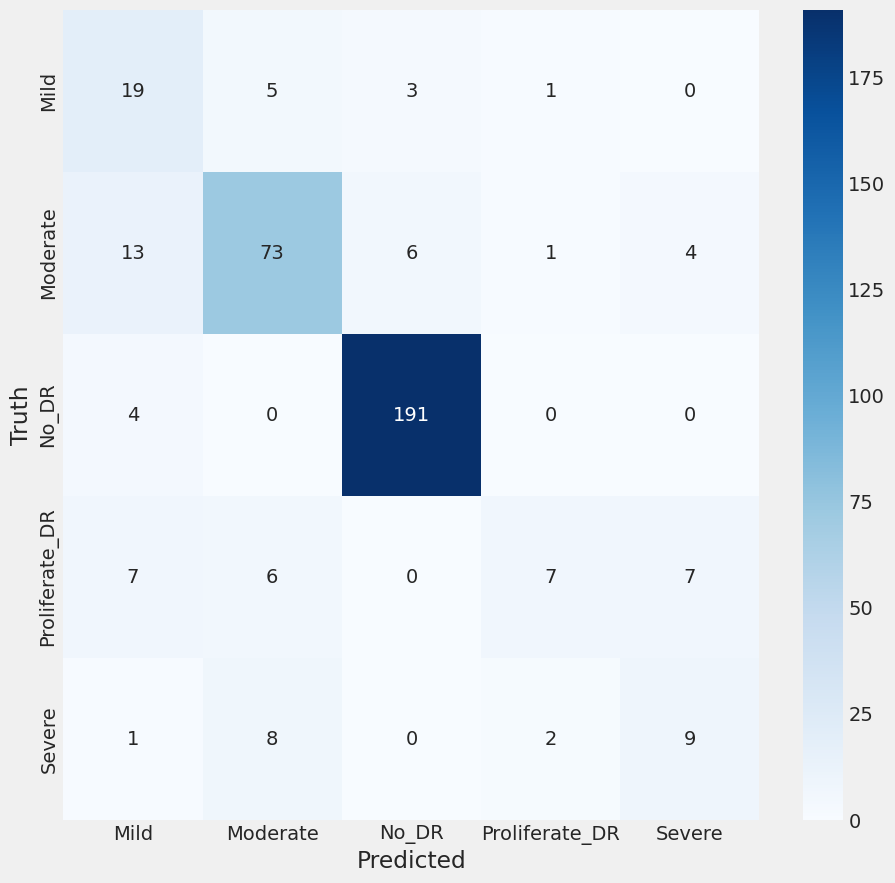

In [ ]:
# prompt: model giving wrong prediction

import warnings
import logging
from tensorflow.keras.utils import plot_model
from IPython.display import Image

# ... (rest of your existing code) ...

# MODEL PREDICTION
predictions = model.predict(Test)
y_pred = np.argmax(predictions, axis = 1)

#Get true labels from the test generator
y_true = Test.classes

#Chack
print(predictions)
print(y_pred)
print(y_true) # Print the true labels

#Now you can use y_true and y_pred with sklearn's metrics
print(classification_report(y_true, y_pred, target_names=Keys))
cm = confusion_matrix(y_true, y_pred)
print(cm)

#Visualization of the confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=Keys, yticklabels=Keys)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

USING VGG16 TRANFER LEARNING MODEL
*  PREPARING VGG16 MODEL

In [ ]:
from tensorflow import lite
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import random, os
import cv2
import shutil
import keras
import matplotlib.pyplot as plt
from matplotlib.image import imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.metrics import categorical_accuracy
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DiabeticRetinopathyDetection/diabeticRetionpathyDataset/train.csv")

diagnosis_binary = {
        0: 'No_DR',
        1: 'DR',
        2: 'DR',
        3: 'DR',
        4: 'DR'}

diagnosis_classes = {
    0: 'No_DR',
    1: 'Mild',
    2: 'Moderate',
    3: 'Severe',
    4: 'Proliferate_DR',
}


df["binary"] = df["diagnosis"].map(diagnosis_binary.get)
df["type"] = df["diagnosis"].map(diagnosis_classes.get)

In [ ]:
df.head()


id_code  diagnosis binary            type
0  000c1434d8d7          2     DR        Moderate
1  001639a390f0          4     DR  Proliferate_DR
2  0024cdab0c1e          1     DR            Mild
3  002c21358ce6          0  No_DR           No_DR
4  005b95c28852          0  No_DR           No_DR

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from sklearn.preprocessing import LabelBinarizer
!pip install imutils
from imutils import paths
from sklearn.utils import shuffle

In [ ]:
data = []
labels = []
width,height=224,224

imagePaths = list(paths.list_images('/content/drive/MyDrive/DiabeticRetinopathyDetection/diabeticRetionpathyDataset/diabetic_retinopathy_images'))

data = []
labels = []

for imagePath in imagePaths:
    label = imagePath.split(os.path.sep)[-2]
    image = load_img(imagePath, target_size=(width, height))
    image = img_to_array(image)
    data.append(image)
    labels.append(label)

data = np.array(data, dtype="float32")
labels = np.array(labels)

lb = LabelBinarizer()
labels = lb.fit_transform(labels)

data, labels = shuffle(data, labels)

print(data.shape)
print(labels.shape)

(3662, 224, 224, 3)
(3662, 5)


In [ ]:
data = data / 255.0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=.2)

print("Train images:",x_train.shape)
print("Test images:",x_test.shape)
print("Train label:",y_train.shape)
print("Test label:",y_test.shape)

Train images: (2929, 224, 224, 3)
Test images: (733, 224, 224, 3)
Train label: (2929, 5)
Test label: (733, 5)


In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=.2)

print("Train images:",x_train.shape)
print("Test images:",x_val.shape)
print("Train label:",y_train.shape)
print("Test label:",y_val.shape)

Train images: (2343, 224, 224, 3)
Test images: (586, 224, 224, 3)
Train label: (2343, 5)
Test label: (586, 5)


In [ ]:
from keras.models import Model
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, BatchNormalization, Dropout
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.applications.vgg16 import VGG16
from keras import layers

In [ ]:
Vgg16 = VGG16(include_top=False, input_shape= (224,224,3))

Vgg16.trainable=False

In [ ]:
model = Sequential()
model.add(Vgg16)
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64 , activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(32 , activation="relu"))
#model.add(Dropout(0.25))
model.add(Dense(5 , activation="sigmoid"))

model.compile( optimizer="adam" , loss="binary_crossentropy" , metrics=["binary_accuracy"] )
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       1,605,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,322,629 (62.27 MB)

 Trainable params: 1,607,941 (6.13 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
callbacks = [EarlyStopping(monitor='val_binary_accuracy' , patience=10 , restore_best_weights=True)]

history = model.fit(x_train , y_train , epochs=50 , batch_size=64,
                    validation_data=(x_val,y_val), verbose=1 , callbacks = callbacks)

Epoch 1/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 57s 928ms/step - binary_accuracy: 0.7838 - loss: 0.5197 - val_binary_accuracy: 0.8857 - val_loss: 0.3023
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 11s 307ms/step - binary_accuracy: 0.8705 - loss: 0.3208 - val_binary_accuracy: 0.8860 - val_loss: 0.2710
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 11s 305ms/step - binary_accuracy: 0.8893 - loss: 0.2736 - val_binary_accuracy: 0.8949 - val_loss: 0.2648
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 21s 307ms/step - binary_accuracy: 0.8945 - loss: 0.2658 - val_binary_accuracy: 0.8993 - val_loss: 0.2628
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 21s 310ms/step - binary_accuracy: 0.8969 - loss: 0.2562 - val_binary_accuracy: 0.8993 - val_loss: 0.2646
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 21s 323ms/step - binary_accuracy: 0.8935 - loss: 0.2612 - val_binary_accuracy: 0.8857 - val_loss: 0.2573
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 21s 325ms/step - binary_accuracy: 0.8922 - loss: 0.2586 - val_binary_accuracy: 0.8949 - val_loss: 0.2562

In [ ]:
#Evaluation
def plot_curves(history):

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["binary_accuracy"]
  val_accuracy = history.history["val_binary_accuracy"]

  epochs = range(len(history.history["loss"]))

  #plot loss
  plt.plot(epochs, loss, label = "training_loss")
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label = "training_accuracy")
  plt.plot(epochs, val_accuracy, label = "val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()


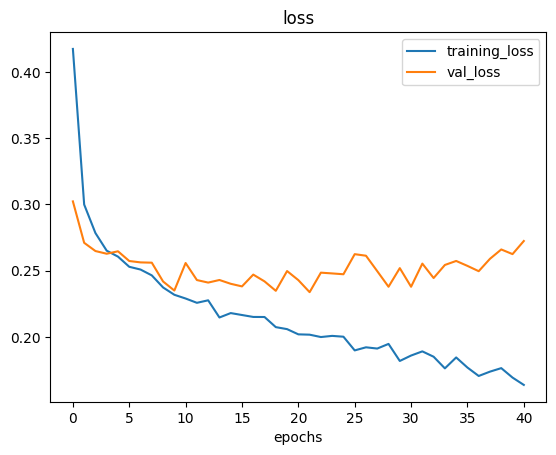

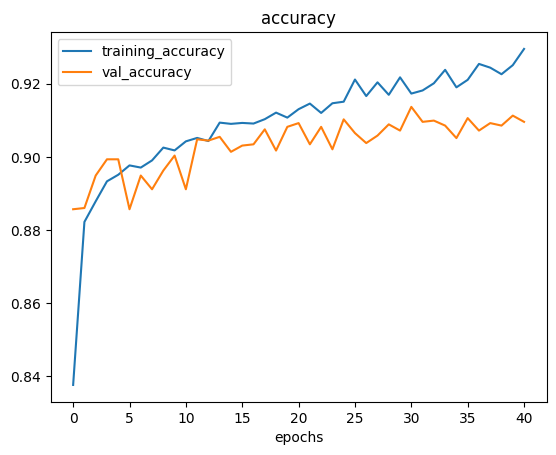

In [ ]:
  plot_curves(history)

In [ ]:
score = model.evaluate(x_test,y_test)


23/23 ━━━━━━━━━━━━━━━━━━━━ 28s 696ms/step - binary_accuracy: 0.9113 - loss: 0.2311


# MODEL PREDICTION

In [ ]:
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)

In [ ]:
index =2
predictions=["Mild","Moderate","NO_DR","Proliferate_DR","Severe"]

img = x_test[index]
RGBImg = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
RGBImg= cv2.resize(RGBImg,(224,224))

plt.imshow(RGBImg)
print(y_test[index]) # true
print(f"Prediction: {predictions[pred[index]]}")

In [ ]:
import cv2

def predict_new(path):
    img = cv2.imread(path)

    RGBImg = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    RGBImg= cv2.resize(RGBImg,(224,224))
    plt.imshow(RGBImg)
    image = np.array(RGBImg) / 255.0

    predict=model.predict(np.array([image]))
    pred=np.argmax(predict,axis=1)

    print(f"Predicted: {predictions[pred[0]]}")

In [ ]:
predict_new('/content/drive/MyDrive/DiabeticRetinopathyDetection/diabeticRetionpathyDataset/diabetic_retinopathy_images/Mild/00e4ddff966a.png')